In [1]:
import import_ipynb  
import utils         
import pandas as pd

In [2]:
%run utils.ipynb

In [3]:
years = [2021, 2022, 2023, 2024, 2025]
philly_crime_all = utils.load_philly_crime_data(years)
philly_crime_all.columns

Index(['the_geom', 'cartodb_id', 'the_geom_webmercator', 'objectid', 'dc_dist',
       'psa', 'dispatch_date_time', 'dispatch_date', 'dispatch_time', 'hour',
       'dc_key', 'location_block', 'ucr_general', 'text_general_code',
       'point_x', 'point_y', 'lat', 'lng', 'year', 'date'],
      dtype='object')

In [4]:
zip_shapes = gpd.read_file("data/Boundaries - ZIP Codes_20250601/geo_export_d8622bad-255e-4041-b5c2-003ea4be6c96.shp")
zip_shapes = zip_shapes.rename(columns={"zip": "zip_code"})  #for matching

<string>:27: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<string>:78: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



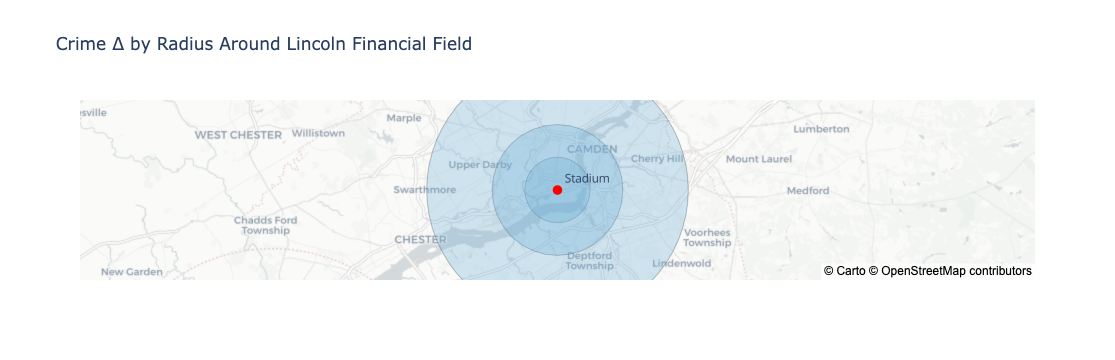

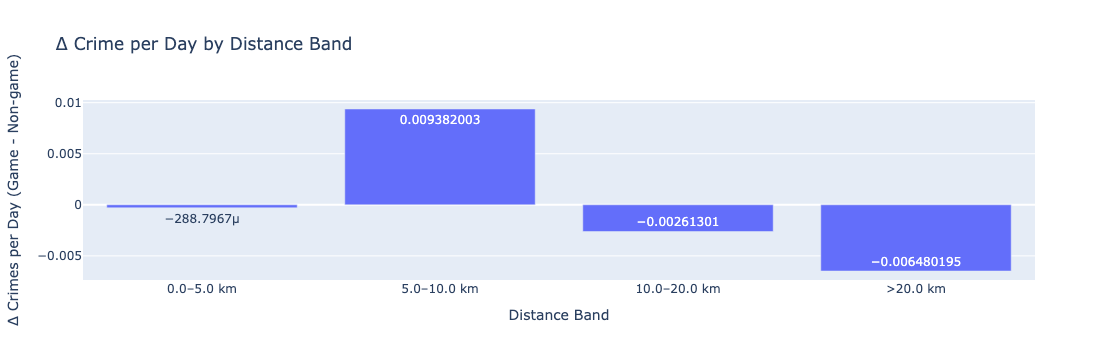

In [17]:
# 1. Define Stadium Coordinates
lincoln_field = (-75.1675, 39.9008)

# 2. Preprocess Crime Data

philly_processed = utils.preprocess_crime_data(philly_crime_all, stadium_coords=lincoln_field, date_col='dispatch_date_time')

# 3. Load Eagles Game Dates
# Load all Eagles games from 2021–2024
eagles_games_all = utils.load_all_eagles_games()

# Filter to home games only
home_games = eagles_games_all[eagles_games_all["Location"] == "Home"]

# 4. Tag Game Windows
philly_tagged = utils.tag_game_windows(
    df=philly_processed,
    games_df=home_games,
    team_name="Eagles",
    window_hours=6
)

# 5. Compute Δ Crime by Distance Bands
philly_delta_by_distance = utils.compute_distance_crime_delta(philly_tagged)

# 6. Plot Stadium-Centered Radius Map with Δ Crime Bar Chart
utils.plot_stadium_radii_map_with_bar_chart(
    stadium_coords=lincoln_field,
    crime_df=philly_tagged,  # must contain 'distance_to_stadium_m' and 'is_game_window'
    radii_meters=[5000, 10000,20000],
    title="Crime Δ by Radius Around Lincoln Financial Field",
    zoom=9
)




In [6]:
chicago_crime_all=pd.read_csv("data/chicago_crime_data.csv")

In [7]:
chicago_crime_all.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

<string>:19: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

<string>:22: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

<string>:27: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<string>:78: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



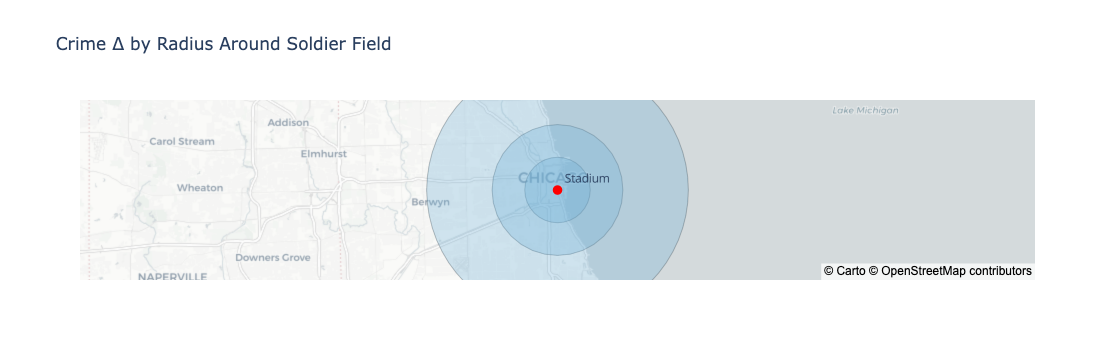

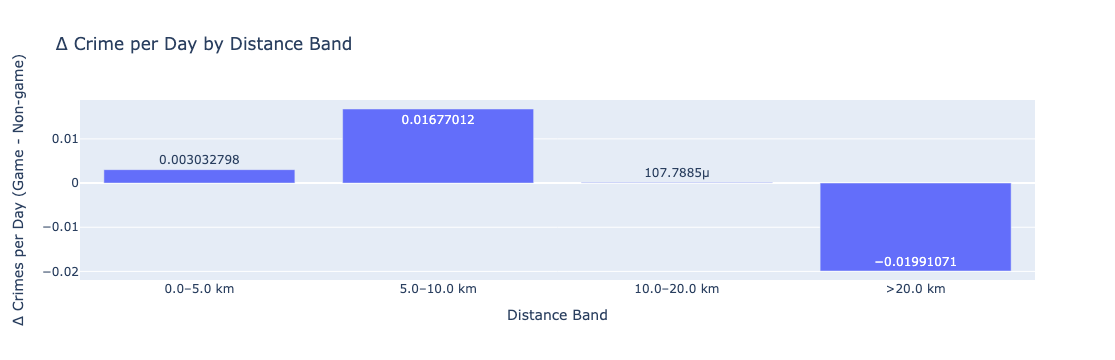

In [8]:
# 1. Define Soldier Field Coordinates (Chicago)
soldier_field = (-87.6190, 41.8623)  # (lon, lat)

# 2. Preprocess Crime Data (replace with your Chicago dataset)
chicago_processed = utils.preprocess_crime_data(chicago_crime_all, stadium_coords=soldier_field, date_col='Date',lat_col='Latitude',
    lng_col='Longitude')

# 3. Load Bears Game Dates
bears_games_all = utils.load_all_bears_games()

# Filter to home games only
home_games = bears_games_all[bears_games_all["Location"] == "Home"]

# 4. Tag Game Windows
chicago_tagged = utils.tag_game_windows(
    df=chicago_processed,
    games_df=home_games,
    team_name="Bears",
    window_hours=6,
    date_col='Date'
)

# 5. Compute Δ Crime by Distance Bands
chicago_delta_by_distance = utils.compute_distance_crime_delta(chicago_tagged)

# 6. Plot Stadium-Centered Radius Map with Δ Crime Bar Chart
utils.plot_stadium_radii_map_with_bar_chart(
    stadium_coords=soldier_field,
    crime_df=chicago_tagged,
    radii_meters=[5000, 10000, 20000],
    title="Crime Δ by Radius Around Soldier Field",
    zoom=9,
    lat_col='Latitude',
    lng_col='Longitude'
)
